In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score,  cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, \
    classification_report,confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

RANDOM_STATE: int = 54

# <font color = 'red'> ЛР 5. Простейший линейный классификатор - логистическая регрессия. </font>

Сложность: <font color = 'green'> Легко  </font>.

Дата составления: 16.10.2024

Срок выполнения: 2 недели (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Логистическая регрессия.  </font>

**Логистическая регрессия** - модель машинного обучения для линейной классификации данных. Основная идея состоит в вычислении вероятности попадания объекта в один из двух классов(в случае бинарной классификации) и последующей классификации этого объекта с помощью порога вероятности.

Общий алгоритм можно описать так. 

1. Вычисляем зачение функции-регрессора для заданной функции $reg = \overline{w}^{T}\overline{x}$.
2. Вычисляем вероятность попадания в класс "1"  $p_{1} = \frac{1}{1+e^{-reg}}$.
3. Классифицируем объект в класс "1" в случае если $p_{1}>0.5$ (хотя порог можно взять другим) и в класс "0" в противоположном случае.

Подробнее изучить можно в конспекте лекции и по [ссылке](https://habr.com/ru/articles/485872/).

[[ 8.02517594 -7.99801519]]


array([-0.70468341])

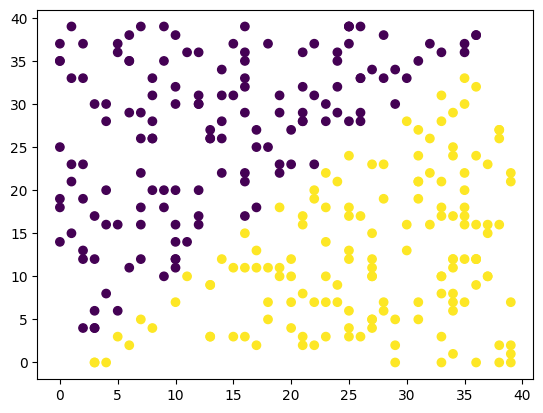

In [13]:
X_data = np.random.randint(0,40,(300,2))
rows = np.where(X_data[:,0]!=X_data[:,1])
X_data = X_data[rows]
y_data = np.array([int(np.sign(elem[0]-elem[1])==1) for elem in X_data])

plt.scatter(X_data[:,0],X_data[:,1],c = y_data);

inner_model = LogisticRegression(penalty=None)
inner_model.fit(X_data, y_data)

inner_preds = inner_model.predict(X_data)
inner_preds_pr = inner_model.predict_proba(X_data)
 # accuracy
a = (inner_preds == y_data).mean()

inner_preds_pr

print(inner_model.coef_)

inner_model.intercept_

<font color = 'red' size = 5>Задание 1 </font>

1. Реализуйте собственные методы для классификации данных методом логистической регрессии. Для минимизации функции потерь используйте градиентный спуск. 
2. Протестируйте ваш метод на искуственных данных. Сравните с работой встроенной функции. 
3. Графически изобразите результаты классификации. Изобразите разделяющую гиперплоскость или кривую.
4. Попробуйте подобрать данные, которые станут проблемой (покажут низкое качество на валидации) для описанной модели.

In [33]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def sigmoid(self, z):
        """Сигмоидная функция активации"""
        return 1 / (1 + np.exp(-z))
    
    def loss(self, y_true, y_pred):
        """Функция потерь: бинарная кросс-энтропия"""
        m = len(y_true)
        return -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        """
        Обучение модели с использованием градиентного спуска
        :param X: матрица признаков (m x n)
        :param y: вектор меток (m x 1)
        """
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        
        for i in range(self.num_iterations):
            # Предсказание
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            
            # Вычисление градиентов
            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)
            
            # Обновление параметров
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        
    def predict_proba(self, X):
        """Вычисляет вероятность принадлежности к классу 1"""
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        """Предсказание классов на основе порога"""
        probabilities = self.predict_proba(X)
        return [1 if prob >= threshold else 0 for prob in probabilities]

manual_accuracy: 0.9830508474576272
sklearn_accuracy: 1.0


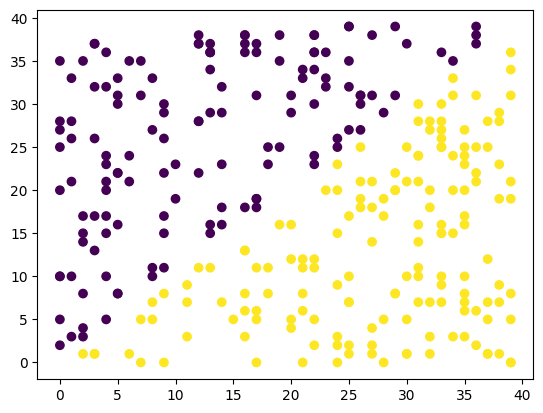

In [50]:
X_data = np.random.randint(0,40,(300,2))
rows = np.where(X_data[:,0]!=X_data[:,1])
X = X_data[rows]
y = np.array([int(np.sign(elem[0] - elem[1]) == 1) for elem in X])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

plt.scatter(X[:,0],X[:,1],c = y);

# Обучение и тестирование модели
manual_model = CustomLogisticRegression(learning_rate=0.1, num_iterations=1000)
manual_model.fit(X_train, y_train)
manual_predictions = manual_model.predict(X_test)
manual_accuracy = accuracy_score(y_test, manual_predictions)

# Сравнение со встроенной логистической регрессией
sklearn_model = LogisticRegression(penalty=None)
sklearn_model.fit(X_train, y_train)
sklearn_predictions = sklearn_model.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

print(f'manual_accuracy: {manual_accuracy}\nsklearn_accuracy: {sklearn_accuracy}')

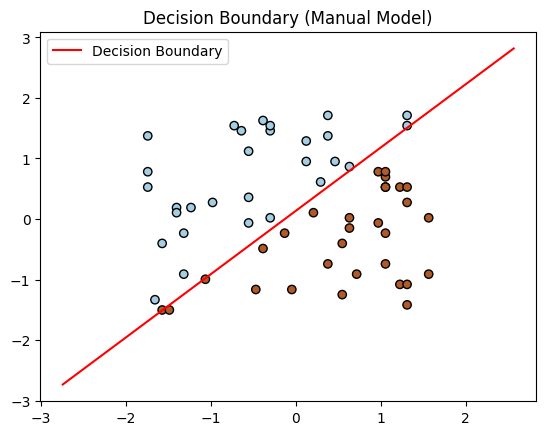

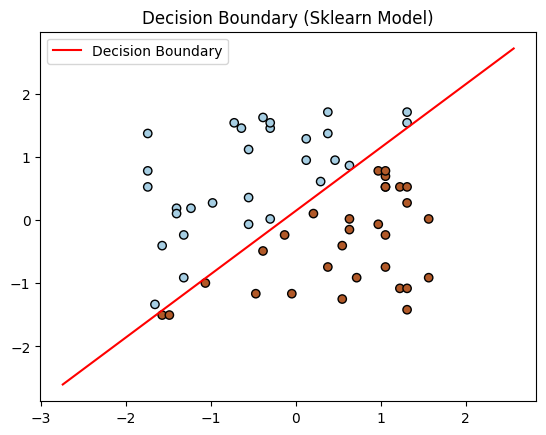

In [52]:
# Графическое изображение разделяющей прямой
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx = np.linspace(x_min, x_max, 100)
    
    # Параметры прямой
    weights = model.weights if hasattr(model, 'weights') else model.coef_[0]
    bias = model.bias if hasattr(model, 'bias') else model.intercept_[0]
    
    # Уравнение прямой: w1*x1 + w2*x2 + b = 0 => x2 = -(w1*x1 + b)/w2
    if weights[1] != 0:  # Проверка, чтобы избежать деления на ноль
        yy = -(weights[0] * xx + bias) / weights[1]
        plt.plot(xx, yy, color='red', label='Decision Boundary')
    
    # Построение графика
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    plt.title(title)
    plt.legend()
    plt.show()

# График для вручную реализованной модели
plot_decision_boundary(manual_model, X_test, y_test, "Decision Boundary (Manual Model)")

# График для sklearn модели
plot_decision_boundary(sklearn_model, X_test, y_test, "Decision Boundary (Sklearn Model)")


manual_accuracy: 0.8
sklearn_accuracy: 0.8


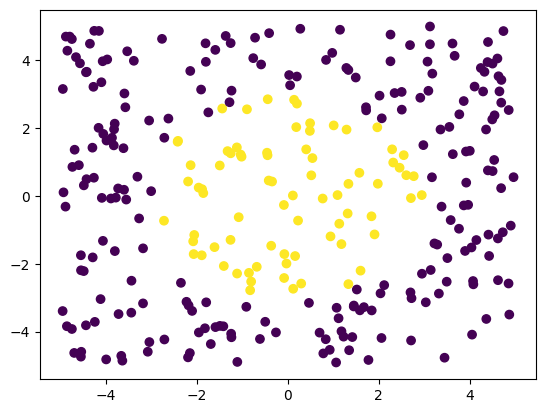

In [57]:
# Генерация данных, которые сложно линейно разделить (нелинейные данные)
np.random.seed(42)
def generate_non_linear_data(n_samples=300):
    X = np.random.uniform(-5, 5, (n_samples, 2))
    y = np.array([1 if x1**2 + x2**2 < 9 else 0 for x1, x2 in X])  # Окружность радиусом 3
    return X, y

X, y = generate_non_linear_data()

# Разделение на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Стандартизация данных
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Обучение и тестирование модели
manual_model = CustomLogisticRegression(learning_rate=0.1, num_iterations=1000)
manual_model.fit(X_train, y_train)
manual_predictions = manual_model.predict(X_test)
manual_accuracy = accuracy_score(y_test, manual_predictions)

# Сравнение со встроенной логистической регрессией
sklearn_model = LogisticRegression(penalty=None)
sklearn_model.fit(X_train, y_train)
sklearn_predictions = sklearn_model.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

print(f'manual_accuracy: {manual_accuracy}\nsklearn_accuracy: {sklearn_accuracy}')

plt.scatter(X[:,0],X[:,1],c = y);

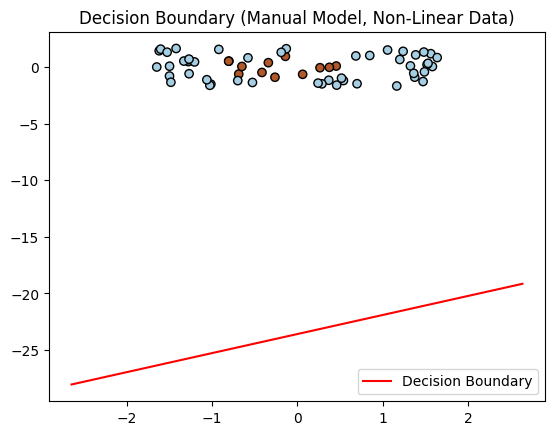

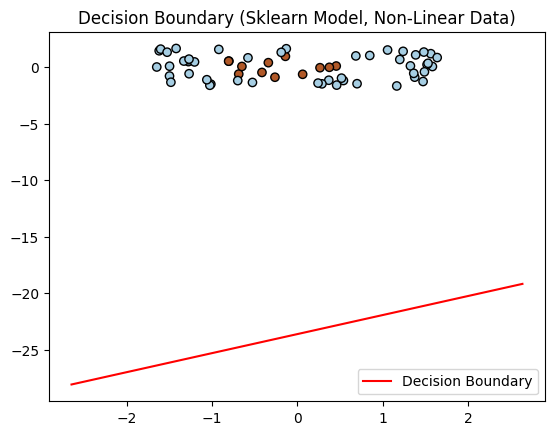

In [58]:
# График для вручную реализованной модели
plot_decision_boundary(manual_model, X_test, y_test, "Decision Boundary (Manual Model, Non-Linear Data)")

# График для sklearn модели
plot_decision_boundary(sklearn_model, X_test, y_test, "Decision Boundary (Sklearn Model, Non-Linear Data)")


<font color = 'red' size = 5>Задание 2 </font>

Для каждого из подзаданий:

1. Проведите предварительную обработку данных.
2. Постройте модель классификации на основе метода логистической регрессии из встроенной библиотеки. 
3. Подберите оптимальные гиперпараметры модели используя различные оценки, кросс-валидацию и валидационные кривые.
4. Сделайте выводы о точности моделей.
5. Используйте регуляризацию, где необходимо. Определите оптимальный коэффициент регуляризации. 
6. Оцените качество модели с помощью ROC-кривых.

[ROC](https://loginom.ru/blog/logistic-regression-roc-auc)


##### 3.1 Скоринг отказа от услуг оператора связи.

Используйте данные из файла [telecom.csv](https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets/code) для предсказания отказа от услуг связи. Столбец "churn". 
Предврительно изучите и подготовьте данные.

#####  3.2 Предсказание диабета у пациентов.

Используйте данные из файла [diabetes.csv](https://www.kaggle.com/datasets/saurabh00007/diabetescsv) для предсказания исхода для пациентов. Столбец "outcome". Предварительно изучите и подготовьте данные. 

#####  3.3 Данные теста микрочипов

Используйте данные из файла microchip_tests.txt для предсказания брака микрочипов. Предварительно изучите и подготовьте данные. 

#####  3.4 Данные о сердечных болезнях

Используйте данные [о прогнозе болезней сердца](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression). Предварительно изучите и подготовьте данные. 


In [3]:
def scale_data(data, column):
    scaler = StandardScaler()
    data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1)).flatten()
    return data

def remove_outliers_by_zscore(data, column):    
    cr_mean = np.nanmean(data[column].values)
    cr_std = np.nanstd(data[column].values)

    data['Zscore_' + column] = (data[column] - cr_mean) / cr_std

    z_3 = (3 * cr_std) + cr_mean
    z_minus3 = cr_mean - (3 * cr_std)

    data.loc[data['Zscore_' + column] > 3, column] = z_3
    data.loc[data['Zscore_' + column] < -3, column] = z_minus3

    return data

TASK 3.1

In [ ]:
telep = pd.read_csv('telecom.csv')
telep.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
telep=pd.get_dummies(telep,columns=["International plan","Voice mail plan"])
telep.drop(['Area code', 'State'], axis=1, inplace=True)
telep.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,True,False,False,True
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,True,False,False,True
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,True,False,True,False
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,False,True,True,False
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,False,True,True,False


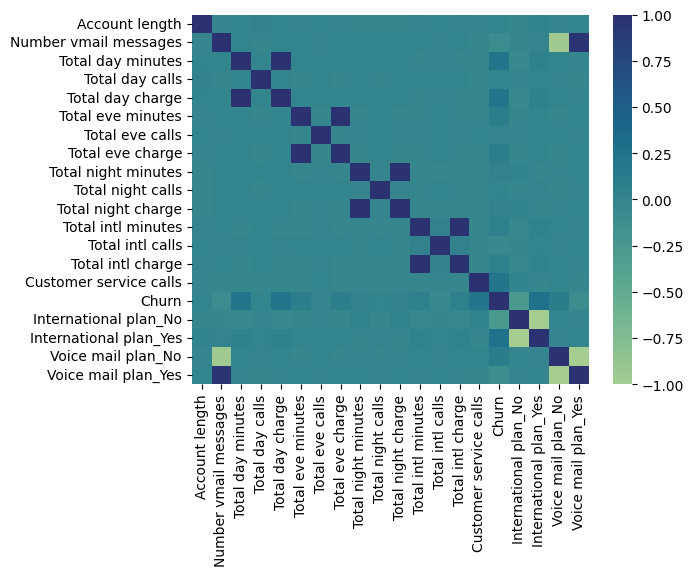

In [13]:
corr_matrix = telep.corr()
sns.heatmap(corr_matrix,cmap="crest");

In [15]:
telep = scale_data(telep, 'Total day minutes')
telep = scale_data(telep, 'Total eve minutes')
telep = scale_data(telep, 'Total intl minutes')
telep = scale_data(telep, 'Total night minutes')
telep = scale_data(telep, 'Customer service calls')

telep = remove_outliers_by_zscore(telep, 'Total day minutes')
telep = remove_outliers_by_zscore(telep, 'Total eve minutes')
telep = remove_outliers_by_zscore(telep, 'Total intl minutes')
telep = remove_outliers_by_zscore(telep, 'Total night minutes')
telep = remove_outliers_by_zscore(telep, 'Customer service calls')

In [16]:
telep.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,Churn,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes,Zscore_Total day minutes,Zscore_Total eve minutes,Zscore_Total intl minutes,Zscore_Total night minutes,Zscore_Customer service calls
0,128,25,1.566767,110,45.07,-0.070610,99,16.78,0.866743,91,...,False,True,False,False,True,1.566767,-0.070610,-0.085008,0.866743,-0.427932
1,107,26,-0.333738,123,27.47,-0.108080,103,16.62,1.058571,103,...,False,True,False,False,True,-0.333738,-0.108080,1.240482,1.058571,-0.427932
2,137,0,1.168304,114,41.38,-1.573383,110,10.30,-0.756869,104,...,False,True,False,True,False,1.168304,-1.573383,0.703121,-0.756869,-1.188218
3,84,0,2.196596,71,50.90,-2.742865,88,5.26,-0.078551,89,...,False,False,True,True,False,2.196596,-2.742865,-1.303026,-0.078551,0.332354
4,75,0,-0.240090,113,28.34,-1.038932,122,12.61,-0.276311,121,...,False,False,True,True,False,-0.240090,-1.038932,-0.049184,-0.276311,1.092641


In [17]:
telep = telep.drop(set(telep.columns) - set(['Churn', 'International plan_No', 
                                 'International plan_Yes', 'Voice mail plan_No',
                                 'Voice mail plan_Yes','Total day minutes', 
                                 'Total eve minutes','Total night minutes', 
                                 'Total intl minutes','Customer service calls']), axis=1)
telep.head()

,Total day minutes,Total eve minutes,Total night minutes,Total intl minutes,Customer service calls,Churn,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,1.566767,-0.070610,0.866743,-0.085008,-0.427932,False,True,False,False,True
1,-0.333738,-0.108080,1.058571,1.240482,-0.427932,False,True,False,False,True
2,1.168304,-1.573383,-0.756869,0.703121,-1.188218,False,True,False,True,False
3,2.196596,-2.742865,-0.078551,-1.303026,0.332354,False,False,True,True,False
4,-0.240090,-1.038932,-0.276311,-0.049184,1.092641,False,False,True,True,False


In [21]:
telep.to_csv('newTelecom.csv', index=False)

In [4]:
telep=pd.read_csv('newtelecom.csv').dropna()
telep.head()

,Total day minutes,Total eve minutes,Total night minutes,Total intl minutes,Customer service calls,Churn,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,1.566767,-0.070610,0.866743,-0.085008,-0.427932,False,True,False,False,True
1,-0.333738,-0.108080,1.058571,1.240482,-0.427932,False,True,False,False,True
2,1.168304,-1.573383,-0.756869,0.703121,-1.188218,False,True,False,True,False
3,2.196596,-2.742865,-0.078551,-1.303026,0.332354,False,False,True,True,False
4,-0.240090,-1.038932,-0.276311,-0.049184,1.092641,False,False,True,True,False


In [9]:
undersample = RandomUnderSampler(sampling_strategy='majority',random_state=RANDOM_STATE) #рандомно уменьшаем размерность
X= telep.drop(['Churn'],axis=True).values
y=telep['Churn']
X,y = undersample.fit_resample(X,y)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.4,random_state=11)

params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None],
         'solver': ['liblinear']}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

logistic_clf.fit(Xtrain,ytrain)

for param, value in logistic_clf.best_params_.items():
    print(f"{param}: {value}")

C: 10
class_weight: balanced
penalty: l2
solver: liblinear


In [10]:
lr= LogisticRegression(penalty=logistic_clf.best_params_['penalty'],
    class_weight=logistic_clf.best_params_['class_weight'],
    C=logistic_clf.best_params_['C'],
    solver=logistic_clf.best_params_['solver'])
lr.fit(Xtrain,ytrain)

ypred=lr.predict(Xtest)

ypredprob=lr.predict_proba(Xtest)
#false positive rate | true positive rate
fpr,tpr,_ = roc_curve(ytest,ypredprob[:,1])
print("AUC :" + str(roc_auc_score(ytest, ypredprob[:, 1])))

AUC :0.8155757413839166


In [17]:
def ROC_Curve_Plot(fpr, tpr):
    plt.plot(fpr,tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.show()

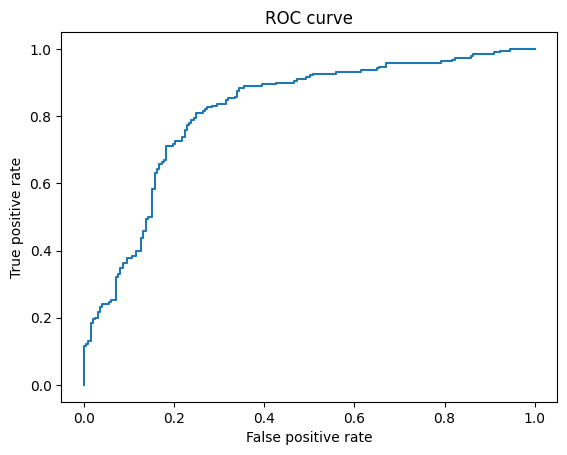

F1 of model: 0.7708333333333334
              precision    recall  f1-score   support

    Positive       0.78      0.77      0.77       197
    Negative       0.76      0.78      0.77       190

    accuracy                           0.77       387
   macro avg       0.77      0.77      0.77       387
weighted avg       0.77      0.77      0.77       387



In [31]:
ROC_Curve_Plot(fpr, tpr)
print("F1 of model: "+ str(f1_score(ytest, ypred)))
print(classification_report(ytest,ypred,target_names=['Positive','Negative']))

<Axes: >

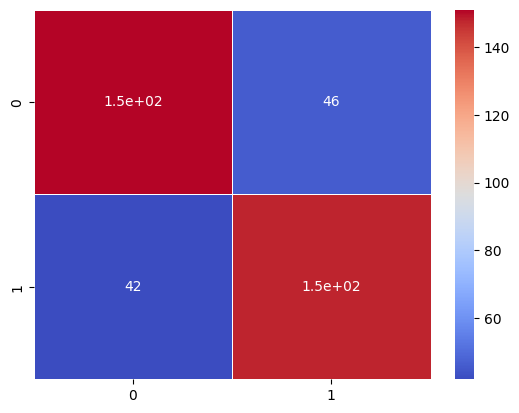

In [32]:
confusion = confusion_matrix(ytest,ypred)
sns.heatmap(confusion, annot=True, cmap='coolwarm', linewidths=0.5)

Result of cross validation: 0.772326030927835


<Axes: >

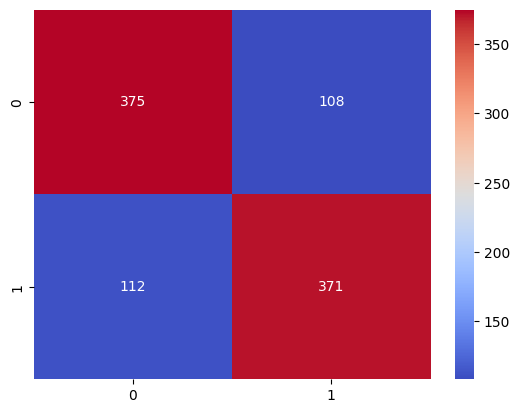

In [34]:
result_lr=cross_val_score(lr,X,y,cv=10,scoring='accuracy')
print("Result of cross validation: "+ str(result_lr.mean()))
y_pred = cross_val_predict(lr,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="coolwarm")

TASK 3.2

In [42]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


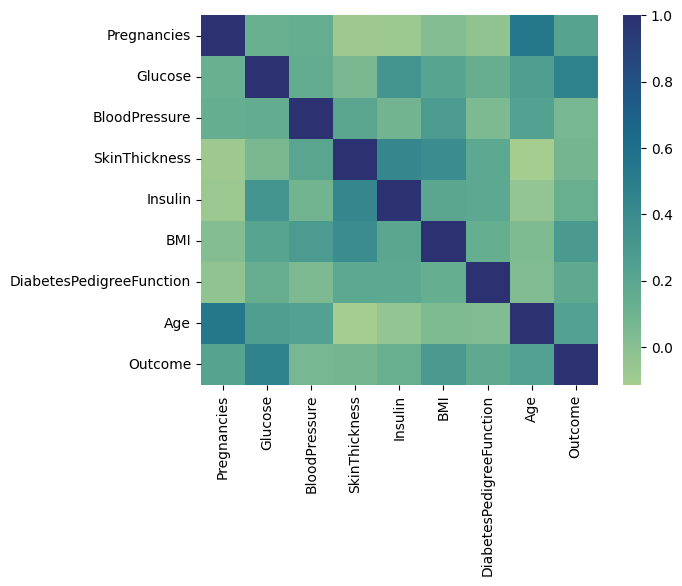

In [43]:
corr_matrix = diabetes.corr()
sns.heatmap(corr_matrix,cmap="crest");

In [44]:
diabetes = scale_data(diabetes, 'Glucose')
diabetes = scale_data(diabetes, 'BloodPressure')
diabetes = scale_data(diabetes, 'SkinThickness')
diabetes = scale_data(diabetes, 'Insulin')
diabetes = scale_data(diabetes, 'BMI')
diabetes = scale_data(diabetes, 'DiabetesPedigreeFunction')
diabetes = scale_data(diabetes, 'Age')

diabetes = remove_outliers_by_zscore(diabetes, 'Glucose')
diabetes = remove_outliers_by_zscore(diabetes, 'BloodPressure')
diabetes = remove_outliers_by_zscore(diabetes, 'SkinThickness')
diabetes = remove_outliers_by_zscore(diabetes, 'Insulin')
diabetes = remove_outliers_by_zscore(diabetes, 'BMI')
diabetes = remove_outliers_by_zscore(diabetes, 'DiabetesPedigreeFunction')
diabetes = remove_outliers_by_zscore(diabetes, 'Age')

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Zscore_Glucose,Zscore_BloodPressure,Zscore_SkinThickness,Zscore_Insulin,Zscore_BMI,Zscore_DiabetesPedigreeFunction,Zscore_Age
0,6,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,8,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,1,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,0,0.504055,-1.504687,0.907270,0.765836,1.409746,3.000000,-0.020496,1,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [45]:
diabetes.to_csv('newDiabetes.csv', index=False)

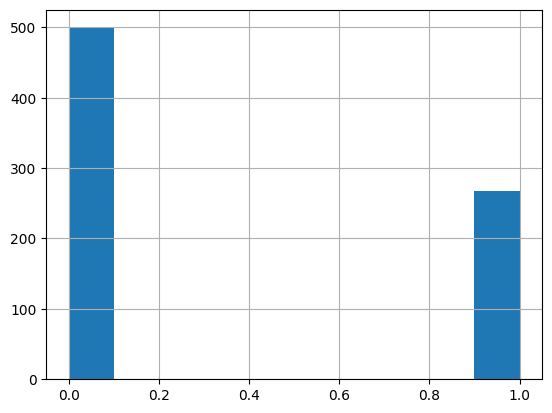

In [46]:
diabetes=pd.read_csv('newDiabetes.csv')
diabetes['Outcome'].hist();

In [47]:
undersample = RandomUnderSampler(sampling_strategy='majority',random_state=RANDOM_STATE)
X= diabetes.drop(['Outcome'],axis=True).values
y=diabetes['Outcome']
X,y = undersample.fit_resample(X,y)

In [48]:
X,y = undersample.fit_resample(X,y)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.4,random_state=11)

params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None],
         'solver': ['liblinear']}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

logistic_clf.fit(Xtrain,ytrain)

for param, value in logistic_clf.best_params_.items():
    print(f"{param}: {value}")

C: 1
class_weight: balanced
penalty: l1
solver: liblinear


In [49]:
lr= LogisticRegression(penalty=logistic_clf.best_params_['penalty'],
                       class_weight=logistic_clf.best_params_['class_weight'], 
                       C=logistic_clf.best_params_['C'],
                       solver=logistic_clf.best_params_['solver'])

lr.fit(Xtrain,ytrain)

ypred=lr.predict(Xtest)

ypredprob=lr.predict_proba(Xtest)
fpr,tpr,_ = roc_curve(ytest,ypredprob[:,1])
print("AUC :" + str(roc_auc_score(ytest, ypredprob[:, 1])))

AUC :0.8442963475852518


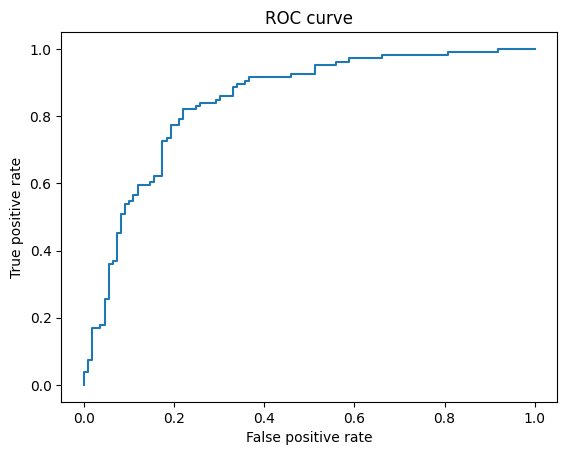

F1 of model: 0.75
              precision    recall  f1-score   support

    Positive       0.74      0.83      0.78       109
    Negative       0.80      0.71      0.75       106

    accuracy                           0.77       215
   macro avg       0.77      0.77      0.77       215
weighted avg       0.77      0.77      0.77       215



In [50]:
ROC_Curve_Plot(fpr, tpr)
print("F1 of model: "+ str(f1_score(ytest, ypred)))
print(classification_report(ytest,ypred,target_names=['Positive','Negative']))

<Axes: >

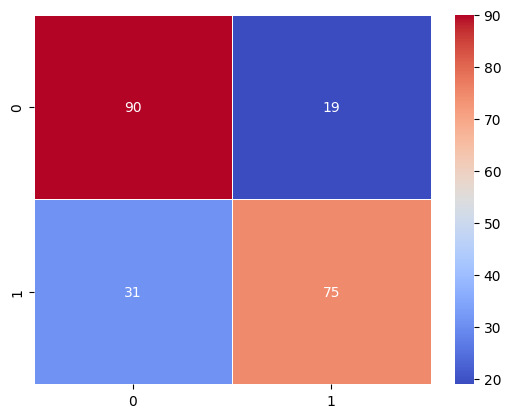

In [51]:
confusion = confusion_matrix(ytest,ypred)
sns.heatmap(confusion, annot=True, cmap='coolwarm', linewidths=0.5)

Result of cross validation: 0.746470999301188


<Axes: >

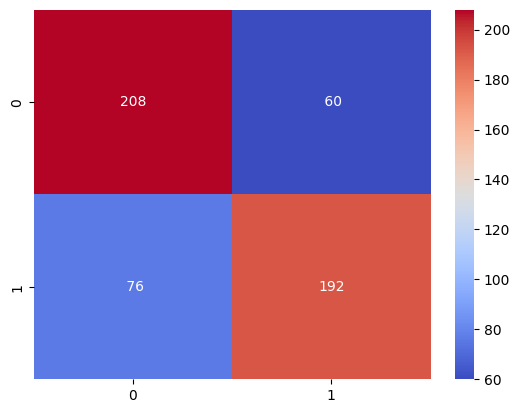

In [52]:
result_lr=cross_val_score(lr,X,y,cv=10,scoring='accuracy')
print("Result of cross validation: "+ str(result_lr.mean()))
y_pred = cross_val_predict(lr,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="coolwarm")

TASK 3.3

In [92]:
chips=pd.read_csv('microchip_tests.txt')
chips.head()

,0.051267,0.69956,1
0,-0.092742,0.68494,1
1,-0.213710,0.69225,1
2,-0.375000,0.50219,1
3,-0.513250,0.46564,1
4,-0.524770,0.20980,1


In [93]:
chips.columns = ['Parameter1', 'Parameter2', 'Outcome']
chips.head()

,Parameter1,Parameter2,Outcome
0,-0.092742,0.68494,1
1,-0.213710,0.69225,1
2,-0.375000,0.50219,1
3,-0.513250,0.46564,1
4,-0.524770,0.20980,1


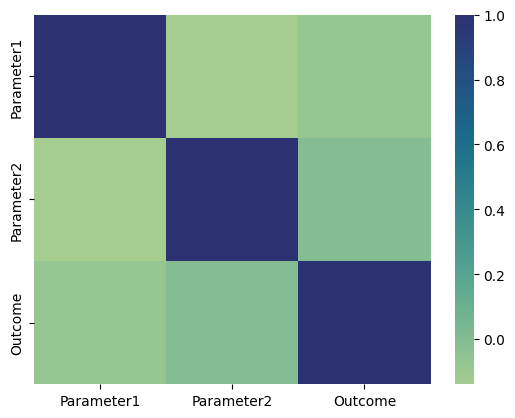

In [94]:
corr_matrix = chips.corr()
sns.heatmap(corr_matrix,cmap="crest");

In [95]:
chips = scale_data(chips, 'Parameter1')
chips = scale_data(chips, 'Parameter2')

chips = remove_outliers_by_zscore(chips, 'Parameter1')
chips = remove_outliers_by_zscore(chips, 'Parameter2')

chips.head()

,Parameter1,Parameter2,Outcome,Zscore_Parameter1,Zscore_Parameter2
0,-0.297090,0.978216,1,-0.297090,0.978216
1,-0.540656,0.992341,1,-0.540656,0.992341
2,-0.865410,0.625094,1,-0.865410,0.625094
3,-1.143773,0.554470,1,-1.143773,0.554470
4,-1.166968,0.060118,1,-1.166968,0.060118


In [96]:
chips.to_csv('newChips.csv', index=False)

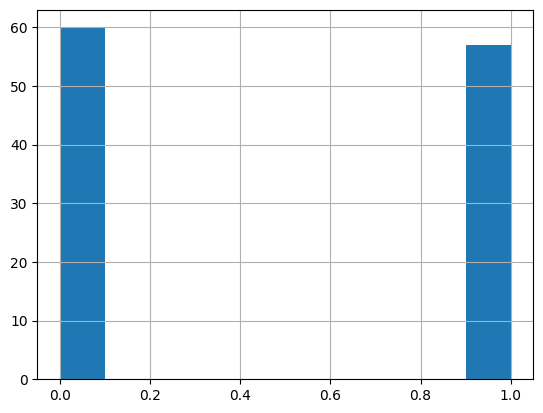

In [97]:
chips=pd.read_csv('newChips.csv')
chips['Outcome'].hist();

In [98]:
undersample = RandomUnderSampler(sampling_strategy='majority',random_state=RANDOM_STATE)
X= chips.drop(['Outcome'],axis=True).values
y=chips['Outcome']
X,y = undersample.fit_resample(X,y)

In [90]:
poly = PolynomialFeatures(degree=10) #модель была слишком линейной и тогда AUC получался ниже 0.5
poly_X = poly.fit_transform(X)

In [91]:
Xtrain,Xtest,ytrain,ytest = train_test_split(poly_X,y,test_size=0.4,random_state=11)

params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None],
         'solver': ['liblinear']}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

logistic_clf.fit(Xtrain,ytrain)

for param, value in logistic_clf.best_params_.items():
    print(f"{param}: {value}")

c:\Users\Nikita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Nikita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Nikita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Nikita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Nikita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  

C: 1
class_weight: None
penalty: l1
solver: liblinear


c:\Users\Nikita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Nikita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Nikita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Nikita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [99]:
lr= LogisticRegression(penalty=logistic_clf.best_params_['penalty'],
                       class_weight=logistic_clf.best_params_['class_weight'], 
                       C=logistic_clf.best_params_['C'],
                       solver=logistic_clf.best_params_['solver'])

lr.fit(Xtrain,ytrain)

ypred=lr.predict(Xtest)

ypredprob=lr.predict_proba(Xtest)
fpr,tpr,_ = roc_curve(ytest,ypredprob[:,1])
print("AUC :" + str(roc_auc_score(ytest, ypredprob[:, 1])))

AUC :0.7638095238095237


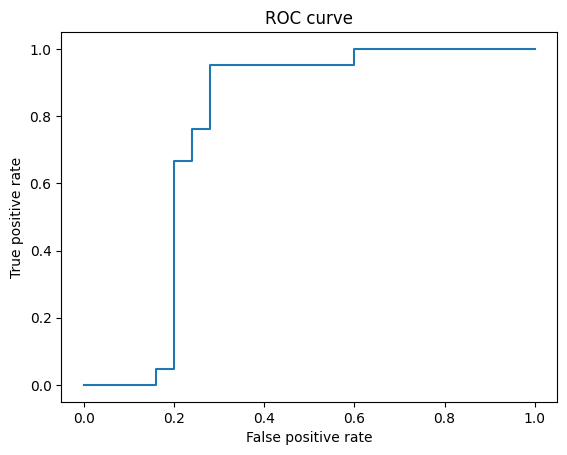

F1 of model: 0.8163265306122449
              precision    recall  f1-score   support

    Positive       0.94      0.68      0.79        25
    Negative       0.71      0.95      0.82        21

    accuracy                           0.80        46
   macro avg       0.83      0.82      0.80        46
weighted avg       0.84      0.80      0.80        46



In [100]:
ROC_Curve_Plot(fpr, tpr)
print("F1 of model: "+ str(f1_score(ytest, ypred)))
print(classification_report(ytest,ypred,target_names=['Positive','Negative']))

<Axes: >

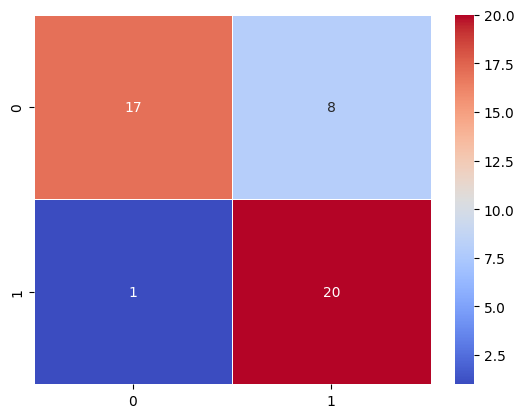

In [101]:
confusion = confusion_matrix(ytest,ypred)
sns.heatmap(confusion, annot=True, cmap='coolwarm', linewidths=0.5)

Result of cross validation: 0.775


<Axes: >

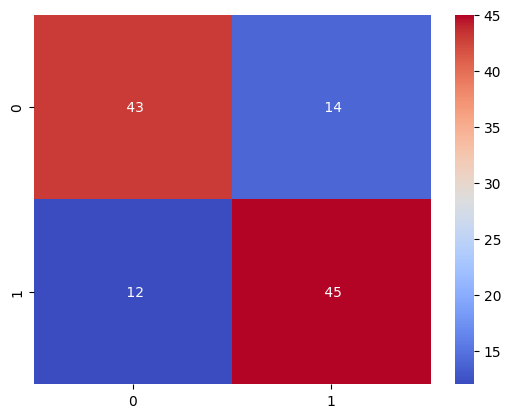

In [103]:
result_lr=cross_val_score(lr,poly_X,y,cv=10,scoring='accuracy')
print("Result of cross validation: "+ str(result_lr.mean()))
y_pred = cross_val_predict(lr,poly_X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="coolwarm")